In [1]:
 #anomaly detection using z-score
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#read the data
df = pd.read_csv("../../data/m16_cpu_usage_v2_10minutes.csv")
df['time'] = pd.to_datetime(df['time'])

In [3]:
df.head()

,time,machine_id,cpu_util
0,2017-10-03 00:00:00,m16,0.300000
1,2017-10-03 00:10:00,m16,0.340000
2,2017-10-03 00:20:00,m16,0.253333
3,2017-10-03 00:30:00,m16,0.200000
4,2017-10-03 00:40:00,m16,0.200000


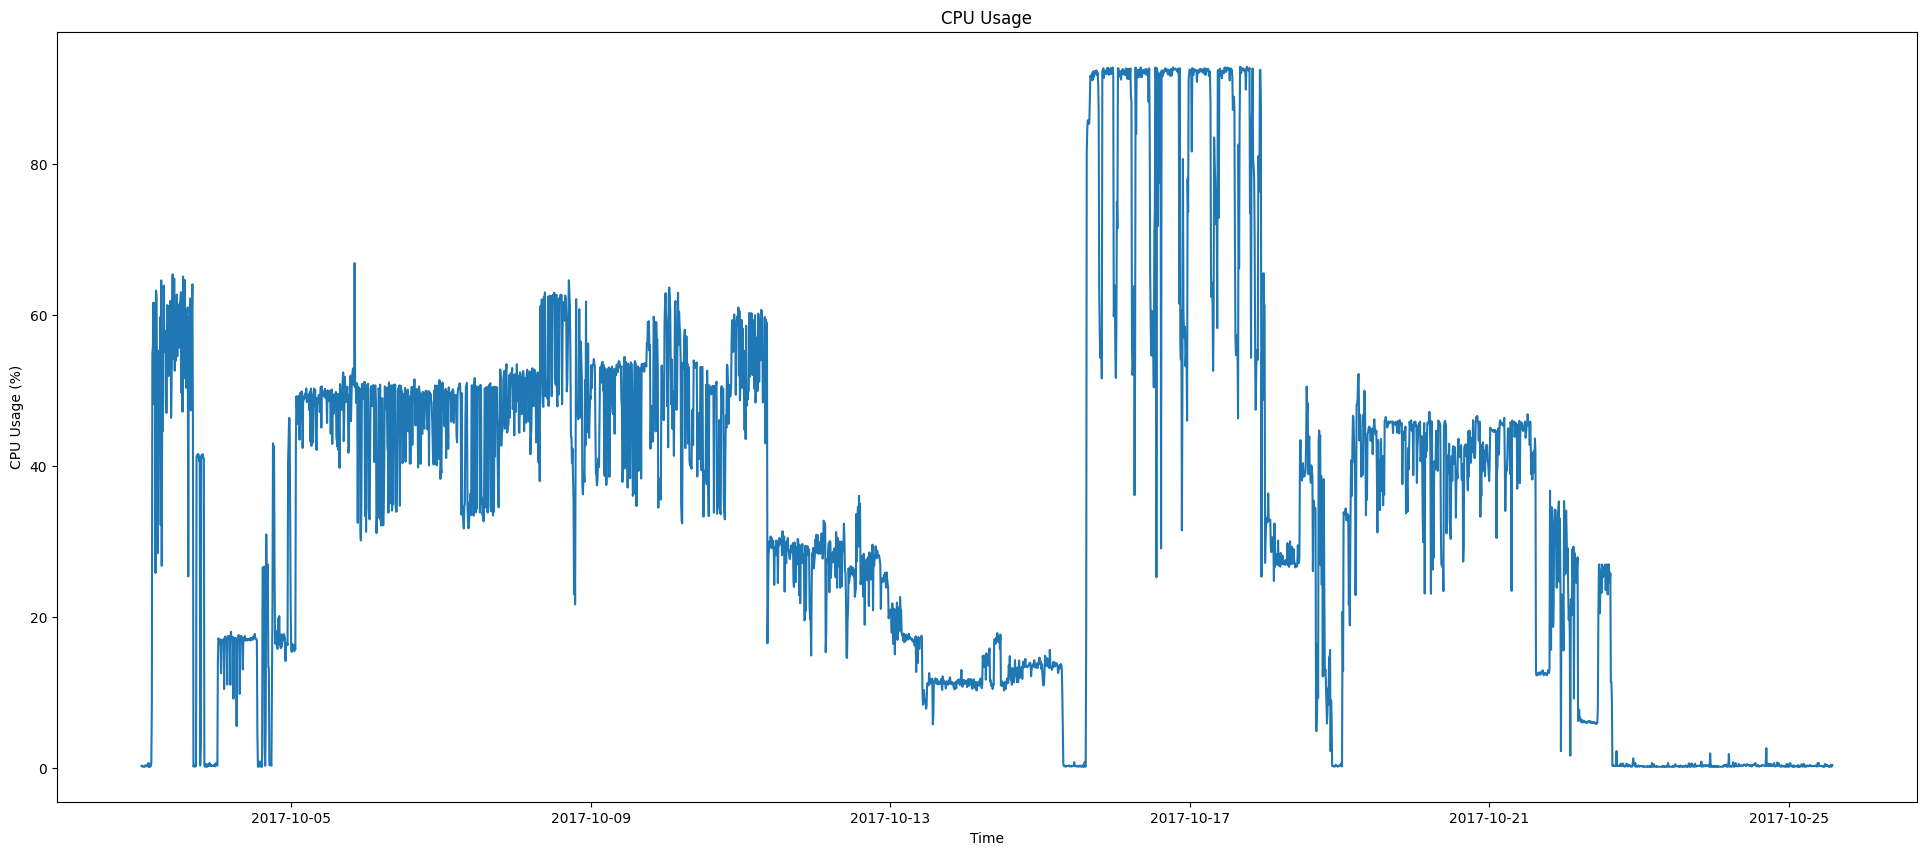

In [4]:
#plot data
plt.figure(figsize=(24, 10))
plt.plot(df['time'], df['cpu_util'])
plt.title('CPU Usage')
plt.ylabel('CPU Usage (%)')
plt.xlabel('Time')
plt.show()


In [14]:
def z_score_detect(data,threshold):
    '''
    data: time series data
    threshold: threshold to detect anomaly
    '''
    #calculate mean and std
    mean = np.mean(data)
    std = np.std(data)
    #calculate z-score
    z_score = (data - mean)/std
    #find anomaly
    anomaly = np.where(z_score > threshold)
    return anomaly

In [15]:
#find anomalies
anomalies = z_score_detect(df['cpu_util'], threshold=1)
print(anomalies)

(array([  23,   26,   28,   29,   38,   43,   50,   55,   56,   60,   63,
         65,   68,   70,   71,   72,   74,   75,   76,   78,   80,   83,
         88,   89,   94,   96,   98,  410,  767,  770,  774,  775,  776,
        782,  785,  787,  788,  790,  791,  792,  793,  794,  798,  801,
        804,  805,  806,  807,  808,  811,  815,  816,  822,  823,  824,
        836,  842,  855, 1007, 1008, 1009, 1014, 1015, 1016, 1017, 1026,
       1027, 1032, 1034, 1140, 1148, 1150, 1169, 1173, 1174, 1186, 1187,
       1192, 1193, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826,
       1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837,
       1838, 1839, 1840, 1841, 1842, 1848, 1849, 1850, 1851, 1852, 1853,
       1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864,
       1865, 1866, 1867, 1868, 1869, 1871, 1872, 1876, 1877, 1878, 1879,
       1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1

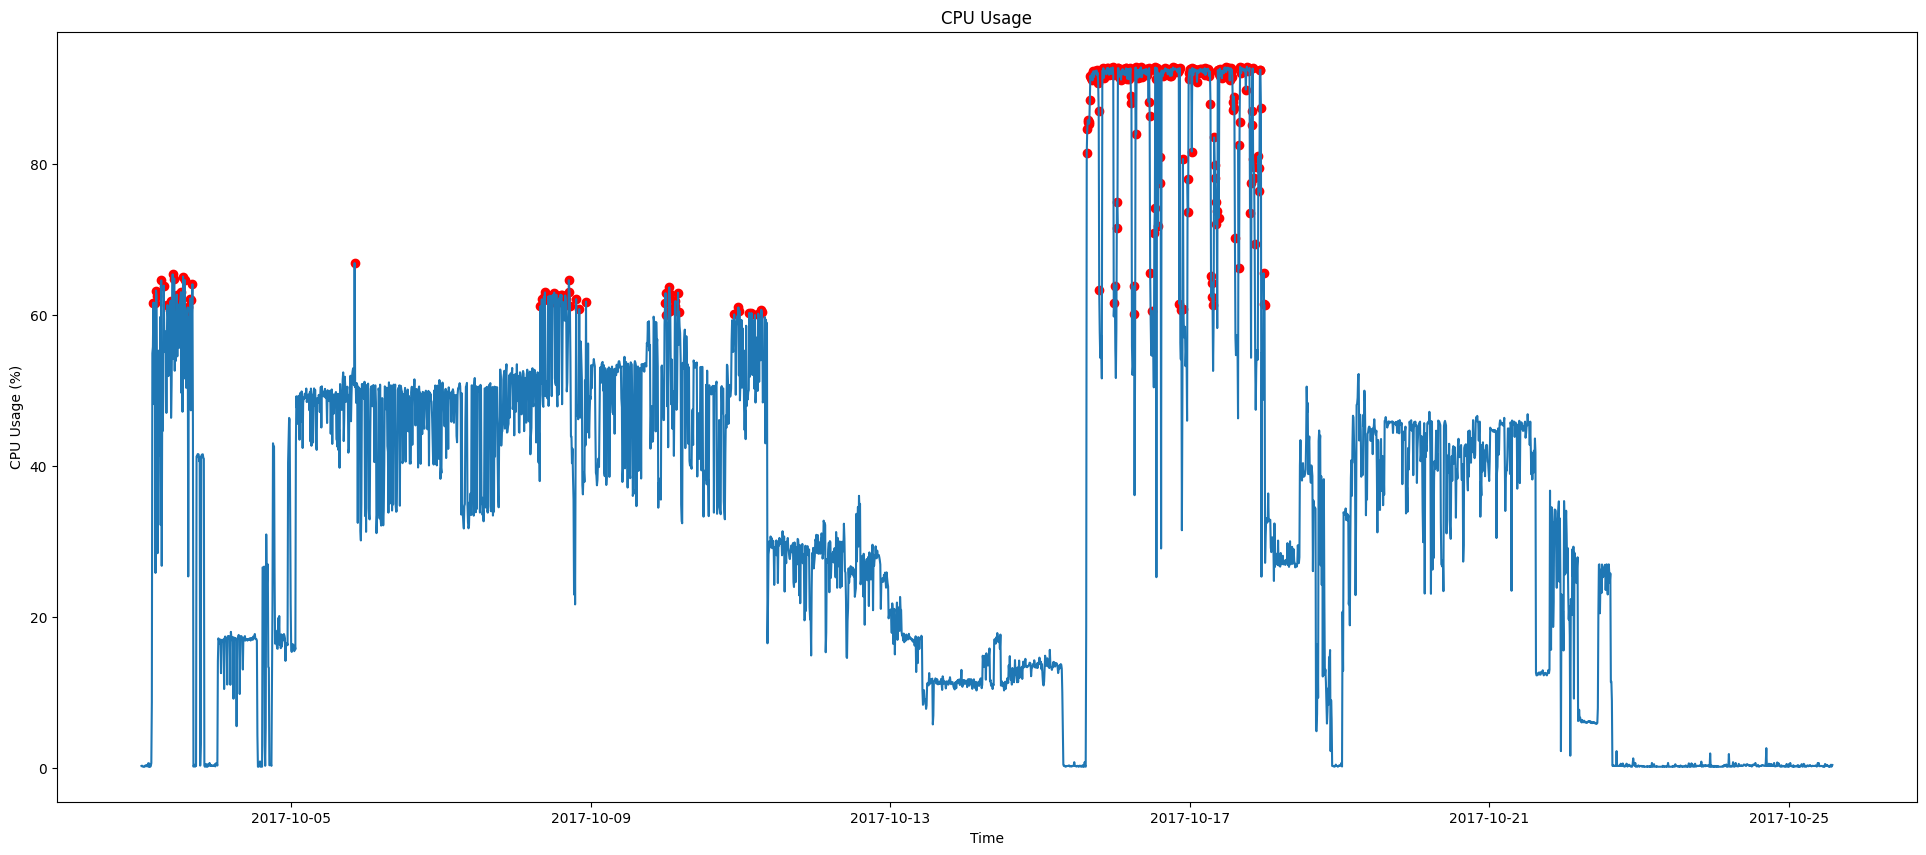

In [23]:
#plot anomalies
plt.figure(figsize=(24, 10))
plt.plot(df['time'], df['cpu_util'])
plt.scatter(df['time'][anomalies[0]], df['cpu_util'][anomalies[0]], color='r')
plt.title('CPU Usage')
plt.ylabel('CPU Usage (%)')
plt.xlabel('Time')
plt.show()
